In [1]:
import scipy.io
import numpy as np
import pandas as pd

data = scipy.io.loadmat("/notebooks/data/cars/cars_annos.mat")
train_data = scipy.io.loadmat("/notebooks/data/cars/devkit/cars_train_annos.mat")
meta_data = scipy.io.loadmat("/notebooks/data/cars/devkit/cars_meta.mat")

In [2]:
train_len = len(train_data['annotations'][0])
train_len

8144

In [3]:
class_int = train_data['annotations'][0][0]['class']
class_int = int(class_int)
class_int

14

In [4]:
class_fname = train_data['annotations'][0][0]['fname']
class_fname = str(class_fname)[2:-2]
class_fname

'00001.jpg'

In [5]:
class_len = len(meta_data['class_names'][0])
class_len

196

In [6]:
class_list = []
for name in meta_data['class_names'][0]:
    name = str(name)
    name = name[2:-2]
    class_list.append(name)

In [7]:
class_dict = {}

In [8]:
for i, name in enumerate(class_list):
    class_dict[i+1] = name

In [9]:
train_df = pd.DataFrame(columns=['image_id', 'attributes'], index=range(train_len))

In [10]:
for i in range(train_len):
    class_fname = train_data['annotations'][0][i]['fname']
    class_fname = str(class_fname)[2:-2]
    
    class_int = train_data['annotations'][0][i]['class']
    class_int = int(class_int)
    class_name = class_dict[class_int]
    class_name = class_name.replace(' ', '_')

    train_df.loc[i].image_id = class_fname
    train_df.loc[i].attributes = class_name

In [11]:
train_df

,image_id,attributes
0,00001.jpg,Audi_TTS_Coupe_2012
1,00002.jpg,Acura_TL_Sedan_2012
2,00003.jpg,Dodge_Dakota_Club_Cab_2007
3,00004.jpg,Hyundai_Sonata_Hybrid_Sedan_2012
4,00005.jpg,Ford_F-450_Super_Duty_Crew_Cab_2012
5,00006.jpg,Geo_Metro_Convertible_1993
6,00007.jpg,Dodge_Journey_SUV_2012
7,00008.jpg,Dodge_Charger_Sedan_2012
8,00009.jpg,Mitsubishi_Lancer_Sedan_2012
9,00010.jpg,Chevrolet_Traverse_SUV_2012


In [12]:
train_df.to_csv('/notebooks/data/cars/train.csv', index_label=False, index=False)

In [13]:
train_df.to_csv('cars/train.csv', index_label=False, index=False)

In [14]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.insert(0, "/notebooks/")
from fastai.imports import *

In [15]:
PATH = "/notebooks/data/cars/"
IMG_PATH = "/notebooks/data/cars/cars_train/"
sz=224

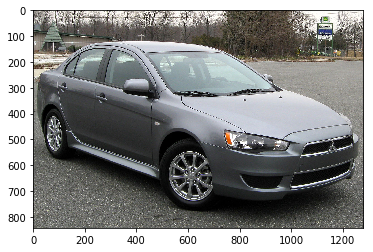

In [16]:
img = plt.imread(f'{IMG_PATH}00009.jpg')
plt.imshow(img);

In [17]:
train_csv = f'/notebooks/notebook/projects/cars/train.csv'
train_df = pd.read_csv(train_csv, encoding='utf-8')

In [18]:
train_df

,image_id,attributes
0,00001.jpg,Audi_TTS_Coupe_2012
1,00002.jpg,Acura_TL_Sedan_2012
2,00003.jpg,Dodge_Dakota_Club_Cab_2007
3,00004.jpg,Hyundai_Sonata_Hybrid_Sedan_2012
4,00005.jpg,Ford_F-450_Super_Duty_Crew_Cab_2012
5,00006.jpg,Geo_Metro_Convertible_1993
6,00007.jpg,Dodge_Journey_SUV_2012
7,00008.jpg,Dodge_Charger_Sedan_2012
8,00009.jpg,Mitsubishi_Lancer_Sedan_2012
9,00010.jpg,Chevrolet_Traverse_SUV_2012
